In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False

In [2]:
import sys 
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData
from ExtFunctions import interpCores

In [3]:
site = 'SiteB'

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']

core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']


DataAll = GetCoreData(site)

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


In [4]:
def DiffLen_V_Npeaks(site_in, diffLen_start, diffLen_end, max_Npeaks = 500):
    site = site_in

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']

    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTamb = CoreSpecs['dTamb']
    dLaki = CoreSpecs['dLaki']


    DataAll = GetCoreData(site)
    
    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
    data_dens = DataAll[4]; data_dens_LT = DataAll[5]
    data_diff = DataAll[6]; data_diff_LT = DataAll[7]

    
    depth_LT = data_d18O_LT['depth']
    d18O_LT = data_d18O_LT['d18O']

    depth_LT_int, d18O_LT_int, Delta = interpCores(np.asarray(depth_LT)[0], np.asarray(depth_LT)[-1], depth_LT, d18O_LT)

    inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, max_Npeaks, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)
    diffLen = inst.spectralEstimate()
    difflenEstHL = inst.diffLenEstimateHL()
    depth1, data, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data = inst.backDiffused(theoDiffLen=False,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15)
    
    return depth1, data, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data

In [5]:
Sites = list(coreNames.drop([1,2,5,8,10]))

DiffLens = []
Npeaks = []

for i in range(len(Sites)):
    print('\nSite: ' + Sites[i] + '\n')
    _, _, _, _, arr_DiffLens, arr_Npeaks, _, _ = DiffLen_V_Npeaks(Sites[i], diffLen_start=0.005, diffLen_end = 0.15)
    DiffLens.append(arr_DiffLens)
    Npeaks.append(arr_Npeaks)


Site: Crete

No ECM file found, setting empty df instead
Starting sigma: 0.50 [cm]
100. Npeaks: 29, diffLen: 1.505 cm
200. Npeaks: 30, diffLen: 2.510 cm
300. Npeaks: 30, diffLen: 3.515 cm
400. Npeaks: 31, diffLen: 4.520 cm
500. Npeaks: 32, diffLen: 5.525 cm
600. Npeaks: 34, diffLen: 6.530 cm
700. Npeaks: 45, diffLen: 7.535 cm
800. Npeaks: 58, diffLen: 8.540 cm
900. Npeaks: 65, diffLen: 9.545 cm
1000. Npeaks: 130, diffLen: 10.550 cm
1100. Npeaks: 190, diffLen: 11.555 cm
1200. Npeaks: 191, diffLen: 12.560 cm
1300. Npeaks: 191, diffLen: 13.565 cm
1400. Npeaks: 191, diffLen: 14.570 cm
Final sigma: 14.98 [cm]
Final # of peaks: 191

Site: SiteA

Starting sigma: 0.50 [cm]
100. Npeaks: 28, diffLen: 1.505 cm
200. Npeaks: 29, diffLen: 2.510 cm
300. Npeaks: 30, diffLen: 3.515 cm
400. Npeaks: 32, diffLen: 4.520 cm
500. Npeaks: 32, diffLen: 5.525 cm
600. Npeaks: 36, diffLen: 6.530 cm
700. Npeaks: 44, diffLen: 7.535 cm
800. Npeaks: 54, diffLen: 8.540 cm
900. Npeaks: 68, diffLen: 9.545 cm
1000. Npea

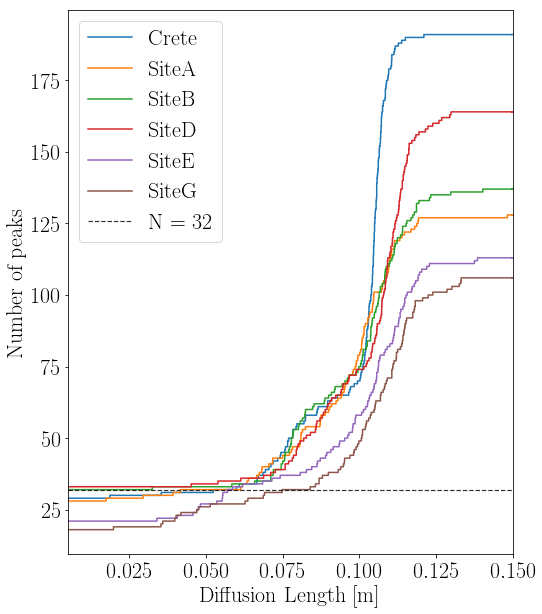

In [180]:
fig, ax = plt.subplots(figsize=(8,9))
for i in range(len(Sites)):
    ax.step(DiffLens[i], Npeaks[i], label=Sites[i])
ax.axhline(y=32,ls='--',color='k', lw=1.2, alpha=0.8,label='N = 32')
ax.set(xlabel='Diffusion Length [m]', ylabel='Number of peaks', xlim=(0.005,0.15))
ax.legend()
fig.tight_layout();

#fig.savefig('../WrittenWork/Figures/' + 'NpeaksVdiffLen.jpg', bbox_inches = 'tight')


In [135]:
idxs = []
Sites_DiffLens_32 = []

Sites_DiffLens_upTo32 = []
Sites_Npeaks_upTo32 = []

for i in range(len(Sites)):
    idx = np.where(np.asarray(Npeaks[i]) == 32)[0]
    idxs.append(idx)
    Site_DiffLens_32 = np.asarray(DiffLens[i])[idx]
    Sites_DiffLens_32.append(Site_DiffLens_32)

    idx2 = np.where(np.asarray(Npeaks[i]) <= 32)[0]
    Site_DiffLens_upTo32 = np.asarray(DiffLens[i])[idx2]
    Site_Npeaks_upTo32 = np.asarray(Npeaks[i])[idx2]
    Sites_DiffLens_upTo32.append(Site_DiffLens_upTo32)
    Sites_Npeaks_upTo32.append(Site_Npeaks_upTo32)
    

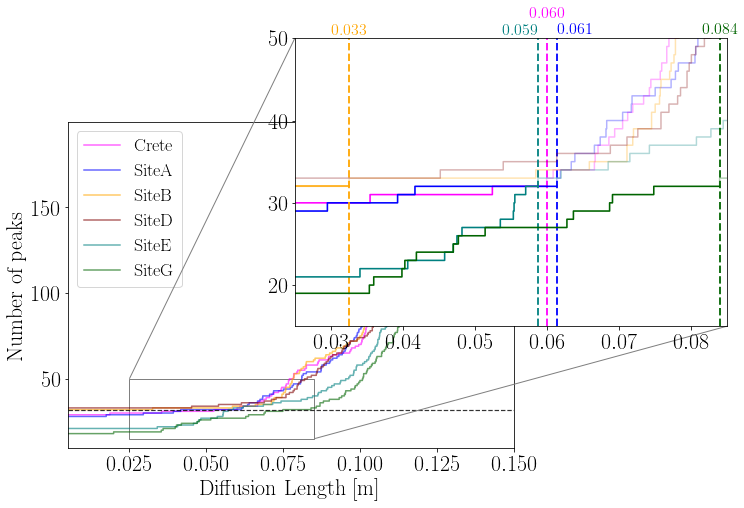

In [185]:
fig, ax = plt.subplots(figsize=(8,6))
plt.rcParams.update({'font.size': 22})
colors = ['magenta','blue','orange','maroon','teal','darkgreen']

for i in range(len(Sites)):
    ax.step(DiffLens[i], Npeaks[i], label=Sites[i],alpha=0.6,color=colors[i])
ax.axhline(y=32,ls='--',color='k', lw=1.2, alpha=0.8)
ax.set(xlabel='Diffusion Length [m]', ylabel='Number of peaks', xlim=(0.005,0.15))
ax.legend(fontsize=18)


x1 = 0.025
x2 = 0.085
y1 = 15
y2 = 50


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(ax, 6,4, loc=2, bbox_to_anchor=(0.5,0.1,1,1), bbox_transform=ax.figure.transFigure)#loc=5) # zoom = 2
for i in range(len(Sites)):
    axins.step(DiffLens[i], Npeaks[i], label=Sites[i], color=colors[i], alpha=0.3)
    if Sites_DiffLens_32[i].any():
        axins.axvline(x=Sites_DiffLens_32[i][-1], lw=2, alpha=0.9, color=colors[i],ls='--')
        #axins.step(np.asarray(Sites_DiffLens_upTo32[i]), np.asarray(Sites_Npeaks_upTo32[i]), color=colors[i])
        axins.step(Sites_DiffLens_upTo32[i], Sites_Npeaks_upTo32[i], label=Sites[i], color=colors[i])
        if (i==0):#or(i==0)or(i==5):
            axins.text(Sites_DiffLens_32[i][-1]-0.0025,50+2.5, f'{Sites_DiffLens_upTo32[i][-1]:.3f}',fontsize=16, color=colors[i])
        elif (i==5)or(i==2):
            axins.text(Sites_DiffLens_32[i][-1]-0.0025,50+0.5, f'{Sites_DiffLens_upTo32[i][-1]:.3f}',fontsize=16, color=colors[i])
        elif (i==1):
            axins.text(Sites_DiffLens_32[i][-1]-0.000,50+0.5, f'{Sites_DiffLens_upTo32[i][-1]:.3f}',fontsize=16, color=colors[i])
        elif (i==4):
            axins.text(Sites_DiffLens_32[i][-1]-0.005,50+0.5, f'{Sites_DiffLens_upTo32[i][-1]:.3f}',fontsize=16, color=colors[i])

    
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.axhline(y=32,ls='--',color='k', lw=1.4, alpha=0.7)

#plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")


#fig.savefig('../WrittenWork/Figures/' + 'NpeaksVdiffLen_zoomIn.jpg', bbox_inches = 'tight')